In [103]:
import json
from os import listdir
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

In [104]:
# Get list of json files in directory
files_in_drive = listdir()
json_files = []
for ix, file in enumerate(files_in_drive):
    if('.json' in file):
        json_files.append(file)
   
# Remove files if wanted
rm = []
# rm.append(['linux', 'ipython', 'spark', 'node']) # cosc
# rm.append(['django', 'keras', 'tensorflow', 'pandas', 'scikit-learn']) # Python
# rm.append(['ggplot2', 'tidyverse']) # R
for layer in rm:
    for f in layer:
        json_files.remove(f+".json")
json_files

['django.json',
 'ggplot2.json',
 'ipython.json',
 'keras.json',
 'linux.json',
 'node.json',
 'pandas.json',
 'scikit-learn.json',
 'spark.json',
 'tensorflow.json',
 'tidyverse.json']

In [105]:
# Prepare keys for dictionary
file_names = []
for file in json_files:
    start = file.find('.')
    file_names.append(file[0:start])

In [106]:
# Put all json data into dictionary
data = {}
for ix, file in enumerate(json_files):
    tmp = json.loads(open(file, encoding="utf-8").read())
    data[file_names[ix]] = tmp['data']['repository']['ref']['target']['history']['edges']

In [107]:
# Graph with weight
repo_weight = []
user_list = []
repo_user_list = {}
network_weight = nx.Graph()

for repo in data:
    ix = 0
    network_weight.add_node(repo)
    while ix < len(data[repo]):
        try:
            user = data[repo][ix]['node']['author']['user']['login']
            network_weight.add_node(user)
            repo_weight.append(repo + " " + user)
            user_list.append(user)
        except:
            pass
        ix += 1
    repo_user_list[repo] = list(set(user_list))

repo_weight = Counter(repo_weight)

In [108]:
for weight in repo_weight:
    space = weight.find(' ')
    r = weight[0:space].strip()
    u = weight[space+1:len(weight)].strip()
    w = repo_weight[weight]
    network_weight.add_edge(r, u, weight=w)

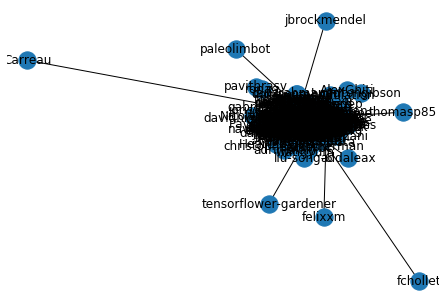

In [109]:
nx.draw(network_weight, with_labels=True, pos=nx.kamada_kawai_layout(network_weight, scale=10))
plt.axis('off')
plt.show()

In [110]:
# Graph without weight
network_no_weight = nx.Graph()

for repo in data:
    network_no_weight.add_node(repo)
    ix = 0
    while ix < len(data[repo]):
        try:
            user = data[repo][ix]['node']['author']['user']['login']
            network_no_weight.add_node(user)
            network_no_weight.add_edge(repo, user)
        except:
            pass
        ix += 1

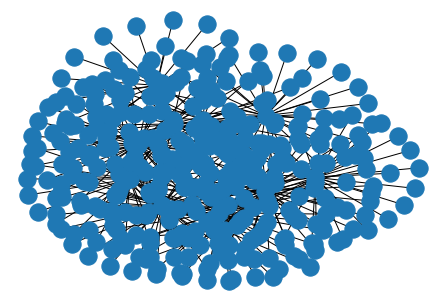

In [112]:
nx.draw(network_no_weight, pos=nx.kamada_kawai_layout(network_no_weight, scale=10), with_labels=False)
plt.axis('off')
plt.show()